# 5.1	Descriptive Statistics

In [3]:
import pandas as pd
df = pd.read_csv("merged_climate_finance_dataset.csv")

In [4]:
# Summary statistics for all relevant columns
summary = df.describe().T[['mean', 'std', 'min', 'max']]
summary.columns = ['Mean', 'Std. Dev.', 'Min', 'Max']
summary

,Mean,Std. Dev.,Min,Max
loan_access,3.828350e+01,1.869245e+01,2.100,8.850000e+01
finance_obstacle,2.037767e+01,1.606533e+01,1.000,6.940000e+01
credit_rating,4.732673e+01,2.544960e+01,8.000,1.000000e+02
temp_anomaly,1.880908e+01,7.940031e+00,-4.008,2.929600e+01
co2_avg,8.454665e+07,1.525924e+08,281395.198,7.744608e+08
precip_mm,1.201941e+03,8.141501e+02,59.000,3.240000e+03


# 5.2 Correlation

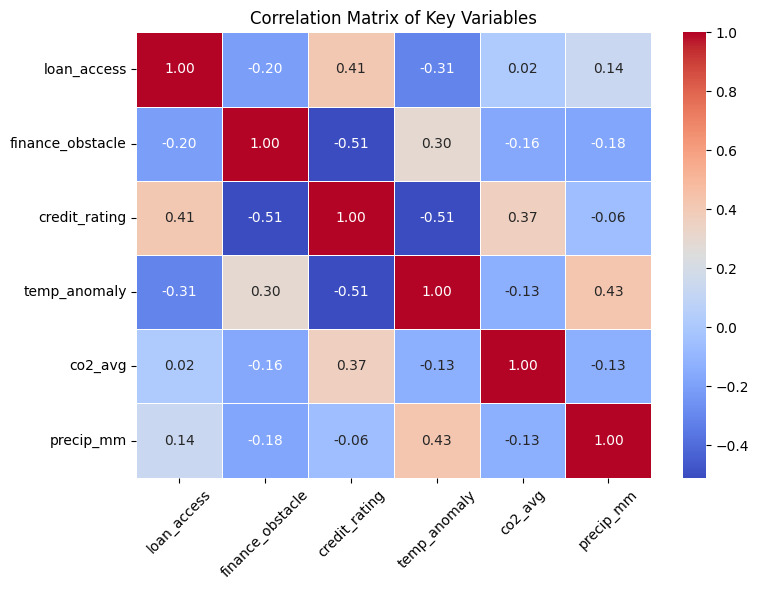

In [5]:

import seaborn as sns
import matplotlib.pyplot as plt


# Load dataset (if not yet loaded)
df = pd.read_csv("merged_climate_finance_dataset.csv")

# Select relevant variables for correlation
cols = ['loan_access', 'finance_obstacle', 'credit_rating', 'temp_anomaly', 'co2_avg', 'precip_mm']
corr_matrix = df[cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Key Variables")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# 5.3 Regression

In [15]:
import statsmodels.api as sm
import numpy as np

In [19]:
# Log-transform CO₂
df['log_co2'] = np.log(df['co2_avg'])

# Define X variables
X = df[['temp_anomaly', 'log_co2', 'precip_mm', 'credit_rating']]
X = sm.add_constant(X)


In [21]:
# Drop rows with missing or infinite values
data = pd.concat([df[['loan_access', 'finance_obstacle']], X], axis=1)
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Separate cleaned X and y
X_clean = data[['const', 'temp_anomaly', 'log_co2', 'precip_mm', 'credit_rating']]
y1_clean = data['loan_access']
y2_clean = data['finance_obstacle']

In [22]:
# Model 1
model1 = sm.OLS(y1_clean, X_clean).fit()
print(model1.summary())

# Model 2
model2 = sm.OLS(y2_clean, X_clean).fit()
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:            loan_access   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     7.513
Date:                Thu, 03 Jul 2025   Prob (F-statistic):           2.70e-05
Time:                        10:18:54   Log-Likelihood:                -417.24
No. Observations:                  99   AIC:                             844.5
Df Residuals:                      94   BIC:                             857.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            43.9841     18.635      2.360

# 6 Robustness Checks

In [26]:
# Matrix without CO2
X_wo_co2 = df[['temp_anomaly', 'precip_mm', 'credit_rating']]
y1 = df['loan_access']

# Combine and clean
data_wo_co2 = pd.concat([y1, X_wo_co2], axis=1)
data_wo_co2 = data_wo_co2.replace([np.inf, -np.inf], np.nan).dropna()

# Redefine X and y
X_wo_co2_clean = sm.add_constant(data_wo_co2[['temp_anomaly', 'precip_mm', 'credit_rating']])
y1_clean = data_wo_co2['loan_access']

# Run model
model_wo_co2 = sm.OLS(y1_clean, X_wo_co2_clean).fit()
print(model_wo_co2.summary())


                            OLS Regression Results                            
Dep. Variable:            loan_access   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     9.941
Date:                Thu, 03 Jul 2025   Prob (F-statistic):           9.22e-06
Time:                        10:48:06   Log-Likelihood:                -417.46
No. Observations:                  99   AIC:                             842.9
Df Residuals:                      95   BIC:                             853.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            33.0216      7.485      4.412

In [27]:
# Mtrix without precipitation
X_wo_precip = df[['temp_anomaly', 'log_co2', 'credit_rating']]
y1 = df['loan_access']

# Combine and clean
data_wo_precip = pd.concat([y1, X_wo_precip], axis=1)
data_wo_precip = data_wo_precip.replace([np.inf, -np.inf], np.nan).dropna()

# Redefine X and y
X_wo_precip_clean = sm.add_constant(data_wo_precip[['temp_anomaly', 'log_co2', 'credit_rating']])
y1_clean_2 = data_wo_precip['loan_access']

# Run model
model_wo_precip = sm.OLS(y1_clean_2, X_wo_precip_clean).fit()
print(model_wo_precip.summary())


                            OLS Regression Results                            
Dep. Variable:            loan_access   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     7.923
Date:                Thu, 03 Jul 2025   Prob (F-statistic):           8.83e-05
Time:                        10:48:50   Log-Likelihood:                -427.76
No. Observations:                 101   AIC:                             863.5
Df Residuals:                      97   BIC:                             874.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            52.2613     18.311      2.854

[('Lagrange Multiplier stat', np.float64(9.128297123774153)), ('p-value', np.float64(0.0579714525146905)), ('f-value', np.float64(2.3869023902231974)), ('f p-value', np.float64(0.05655211500106578))]
